## Outliers e Datas




### 359 - Tratamento de Outliers - Teorica
<h1>Etapas de Data Cleaning</h1><h2>Valores Duplicados</h2><ul><li>Como identificar e tratar</li></ul><h2>Valores Nulos</h2><ul><li>Como identificar e tratar</li></ul><h2>Valores Outliers (Hotliers)</h2><h3>O que são Outliers</h3><ul><li>Valores que fogem muito da distribuição</li><li>Exemplos:<ul><li>Renda do Bill Gates na mesma região</li><li>Pessoas muito altas</li></ul></li></ul><h3>Motivos para Outliers</h3><ul><li><p>Erros de mensuração e amostragem</p><ul><li>Ex: erros de digitação</li><li>Devem ser removidos quando identificados</li></ul></li><li><p>Outliers naturais</p><ul><li>Inerentes aos dados</li><li>Podem ou não ser removidos<ul><li>Médias e medidas de dispersão são sensíveis a outliers</li><li>Mas modelos podem se beneficiar deles during treinamento</li></ul></li></ul></li></ul><h3>Tratamento de Outliers</h3><ul><li>Não remover sem antes identificar a causa</li><li>Podem ser removidos se:<ul><li>Forem erros óbvios</li><li>Não fizerem sentido para o caso de uso</li><li>Não esperarmos esses valores no futuro</li></ul></li></ul>

### 360 - Tratamento de Outliers - Pratico I
<h1>Tratamento de outliers</h1><h2>Identificando outliers</h2><ul><li>Utilizando banco de dados de vinhos com vários atributos</li><li>BoxPlot é uma boa forma de identificar outliers<ul><li>Pontua visualmente quais são os outliers</li></ul></li><li>Algumas variáveis apresentaram outliers<ul><li>Ácido málico</li><li>Ash</li><li>Magnésio</li><li>Intensidade da cor</li></ul></li></ul><h2>Padronização dos dados</h2><ul><li>Aplicou-se padronização (z-score) para poder comparar variáveis<ul><li>Centraliza média em 0 e desvio padrão em 1</li></ul></li><li>Outliers ficaram mais nítidos após padronização</li></ul><h2>Decidindo o que fazer com os outliers</h2><ul><li>Antes de remover outliers, discutir com especialistas do domínio<ul><li>Faz sentido esses valores extremos para os vinhos?</li></ul></li><li>Se fizer sentido manter, fazer transformações nos dados</li></ul><p>Esse é um resumo de alto nível do conteúdo do vídeo, cobrindo o processo de identificar outliers, padronizar os dados para análise e discutir com especialistas do domínio antes de decidir remover outliers. Foi formatado com Markdown para facilitar a visualização.</p>

In [ ]:
# Importação da bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
# Puxando a base
df,_ = datasets.load_wine(return_X_y=True, as_frame = True)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Identificando / removendo outliers
# Box plot com dados " as is "

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

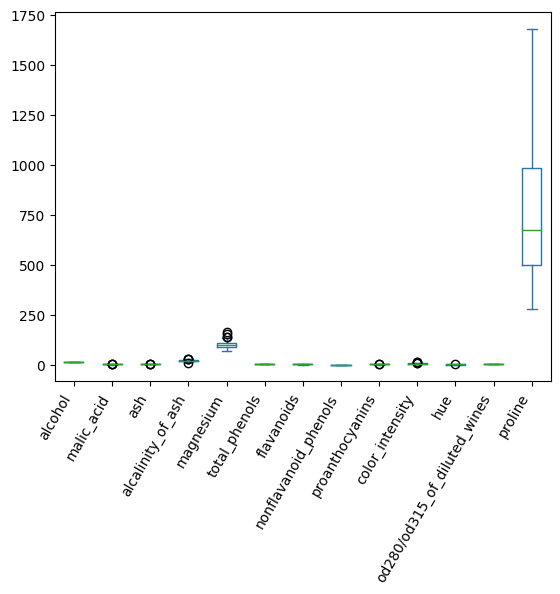

In [ ]:
# Blox plot simples
df.plot.box()
plt.xticks(rotation=60, ha='right')

In [ ]:
from sklearn.preprocessing import scale

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

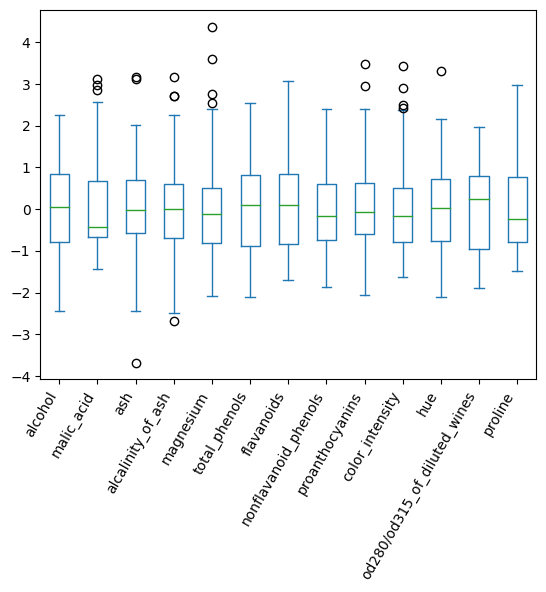

In [ ]:
# Box plot com dados padronizados
df.apply(scale).plot.box ()
plt.xticks(rotation=60, ha='right')

### 361 - Tratamento de Outliers - Pratico II
<h1>Tema central: Identificação e tratamento de outliers</h1><h2>Como o Blocksplot identifica outliers</h2><ul><li>Utiliza a fórmula do intervalo interquartil<ul><li>Q1 - 1,5 * Intervalo interquartil = limite inferior</li><li>Q3 + 1,5 * Intervalo interquartil = limite superior</li></ul></li><li>Valores abaixo do limite inferior = outliers negativos</li><li>Valores acima do limite superior = outliers positivos</li><li>Pode-se usar fator 1,5 ou 3 para identificar outliers extremos</li></ul><h2>Função para identificar outliers</h2><ul><li>Recebe array com os dados</li><li>Calcula quartis e intervalo interquartil</li><li>Retorna array booleano indicando quais são outliers</li><li>Pode aplicar por coluna ou linha</li></ul><h2>Filtrando outliers</h2><ul><li>Pode-se ignorar linhas que contenham outliers</li><li>Compara distribuições com e sem filtro de outliers</li></ul><h2>Outliers após filtragem</h2><ul><li>Novos outliers podem aparecer após filtragem</li><li>Isso ocorre porque a distribuição muda</li><li>Pode-se aplicar filtro com base no Z-score:<ul><li>Valores fora de 3 desvios padrão</li><li>Equivale a 99,7% da distribuição normal</li></ul></li></ul><h2>Próximos passos</h2><ul><li>Ver formas de corrigir outliers nos dados</li></ul>

In [ ]:
# Interquartile range
# lower_outlier = Q1 - 1.5 * IQR (Intervalo de quartil)
# upper_outlier = q3 + 1.5 * IQR
# Factor = a item que vai ser multiplicado 3 a 1.5 utilizando condicional

def is_outlier(array, extreme= False):
  """ Custom function to identify outliers in an array"""
  q1,q3 = np.quantile(array, [.25,.75])
  irq = q3 - q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor * irq
  lower_outlier = q1 - factor * irq

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
# Mostrando aplicações da função em uma dada coluna retorna um array booleando
is_outlier(df.ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: ash, Length: 178, dtype: bool

In [ ]:
# Calculando quantidade de outliers
is_outlier(df.ash).sum()

3

In [ ]:
# Mostrando aplicação da função para todas colunas numéricas contínuas
df.apply(is_outlier)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Calculando quantidades de outliers
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# Removendo outliers
# Ignorar todas as linhas que tem apenas um outliers
# Axis = 1 nível linhas
# ~ que não é
df[~df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


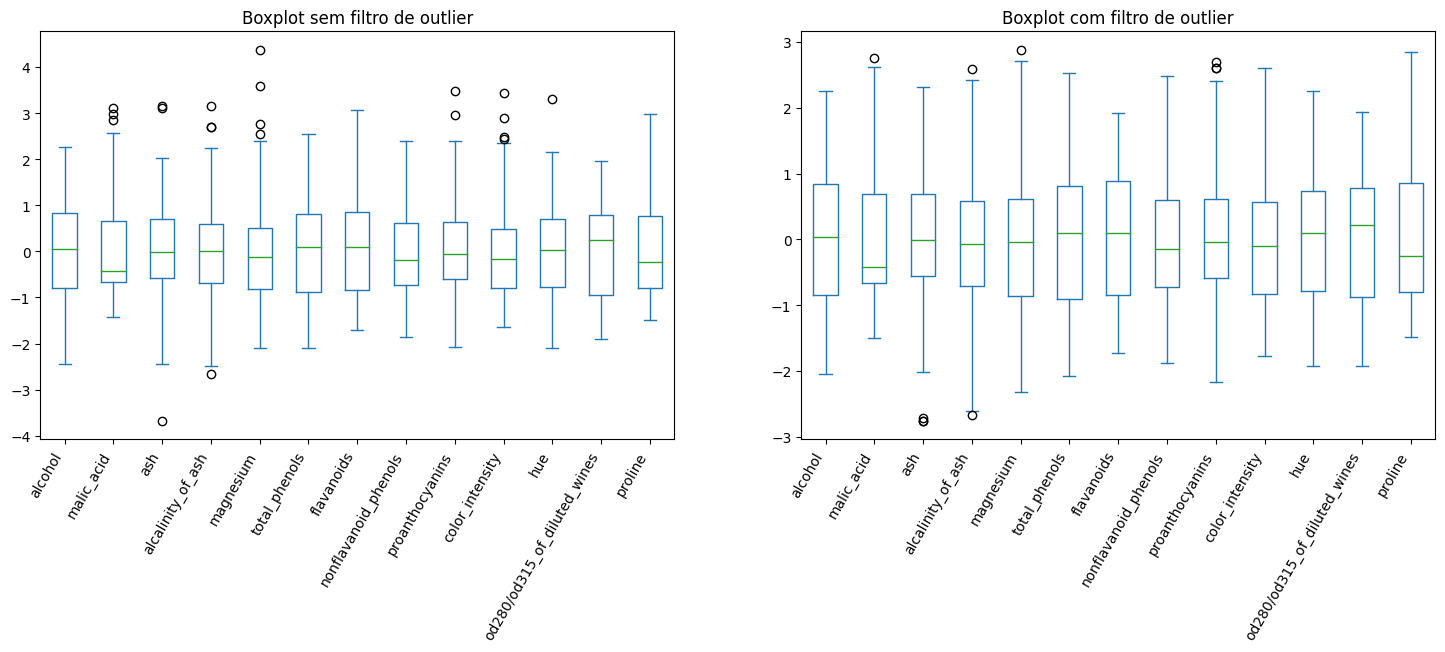

In [ ]:
# Figura lado a lado dos dados originais e padronizados
df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]
fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0],title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [ ]:
# Teste tirando os outliers mais extremos
df_without_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
# Zscore
# Média fica em 0 e desvio padrão 1
# Scale escale os componentes

def zscore_outlier(array):
  scaled_array = scale(array)
  return (scaled_array<-3)|(scaled_array>3)

df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

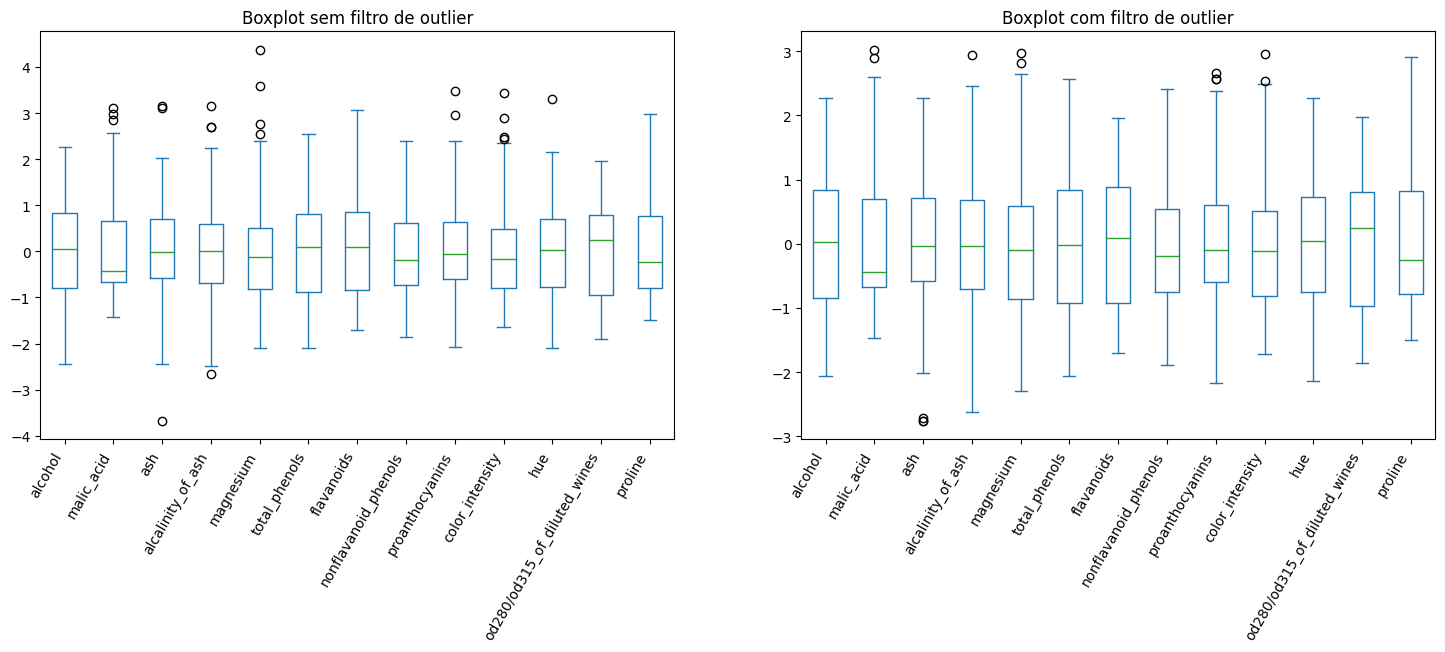

In [ ]:
# Figura lado a lado dos dados originais e padronizados destacando 3 std

fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0],title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

### 362 - Corrigindo Outliers
<h1>Técnicas para corrigir outliers</h1><h2>Markup Cap</h2><ul><li>Consiste em limitar os outliers a valores máximos e mínimos aceitáveis</li><li>Ao invés de remover os outliers, seus valores são alterados</li><li>Critério:<ul><li>Definir percentis máximo e mínimo aceitáveis<ul><li>Ex: 90% e 99% -&gt; manter apenas valores dentro desses percentis</li></ul></li><li>Valores acima do máximo são reduzidos para o valor do percentil máximo</li><li>Valores abaixo do mínimo são aumentados para o valor do percentil mínimo</li></ul></li></ul><h2>Aplicação no vídeo</h2><ul><li><p>Função criada</p><ul><li>Recebe array e percentis mínimo e máximo</li><li>Filtra array, limitando valores conforme os percentis</li></ul></li><li><p>Aplicada em dataframe para corrigir outliers</p></li><li><p>Distribuição dos dados é modificada</p><ul><li>Mas outliers extremos são corrigidos</li></ul></li><li><p>Vantagens:</p><ul><li>Mantém outliers, em vez de removê-los</li><li>Pode definir critério customizado pelos percentis</li><li>Corrige distribuição</li></ul></li></ul>

In [ ]:
# Cap um método substituir os valores que faça mais sentido
# Mostrando percentis
df.describe(percentiles=[.01,.25,.5,.75,.9,.99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [ ]:
# para identificar essa array
# .copy vai direto para tabela
def cap_values(array, lower_quantile=0., upper_quantile=1.):
  array = array.copy()

  lower_quantile= np.quantile(array, lower_quantile)
  upper_quantile= np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [ ]:
# Mostrando percentis após aplicar função
cap_values(df.ash, upper_quantile =.90).max()

2.7

In [ ]:
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01,.25,.5,.75,.9,.99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800


### 363 - Corrigindo Outliers - Log e Box - Cox
<p>TEMA CENTRAL: Tratamento de outliers em dados</p><h1>Transformação log</h1><ul><li>Aplica np.log nos valores para modificar a distribuição</li><li>Reduz a influência de valores muito distantes</li><li>Resulta em menos outliers</li><li>Ainda persistem alguns outliers</li></ul><h1>Transformação Box-Cox</h1><ul><li>Deixa distribuição mais normal possível</li><li>Função do Scikit-Learn (PowerTransform)</li><li>Recebe array e método (Box-Cox ou Johnson)</li><li>Retorna valores transformados e padronizados</li><li>Pode aplicar em um DataFrame inteiro</li></ul><h1>Comparação</h1><ul><li>Log e Box-Cox reduzem outliers</li><li>Box-Cox funciona melhor:<ul><li>Menos outliers</li><li>Outliers mais próximos da distribuição</li><li>Sem precisar excluir valores</li></ul></li></ul><h1>Conclusão</h1><ul><li>Métodos úteis para tratar outliers</li><li>Modificam distribuição sem perder dados</li><li>Box-Cox geralmente melhor para normalizar</li></ul>

In [ ]:
# Log
np.log(df.ash)


0      0.887891
1      0.760806
2      0.982078
3      0.916291
4      1.054312
         ...   
173    0.896088
174    0.908259
175    0.815365
176    0.862890
177    1.007958
Name: ash, Length: 178, dtype: float64

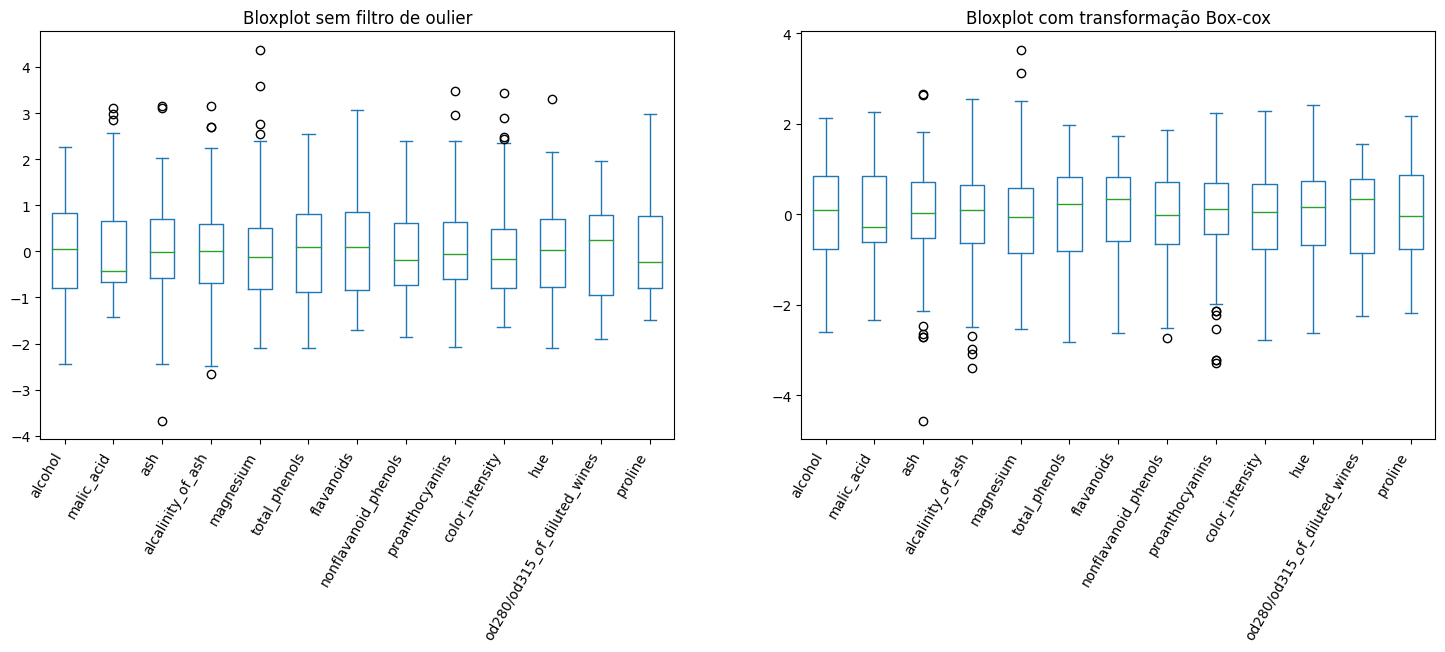

In [ ]:
# Figur a lado a lado dos dados originais e padronizados destacando 3 std

fig,axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Bloxplot sem filtro de oulier')
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Bloxplot com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

In [ ]:
# Box-Cox
from sklearn.preprocessing import power_transform

In [ ]:
power_transform?

In [ ]:
power_transform(df[['ash']], method='box-cox')

array([[ 0.20965583],
       [-0.84042257],
       [ 1.12048779],
       [ 0.47151443],
       [ 1.90687536],
       [ 0.28414782],
       [ 0.28414782],
       [ 0.88935866],
       [-0.73446283],
       [-0.37675501],
       [-0.26810854],
       [-0.19533979],
       [ 0.13542548],
       [ 0.06145799],
       [ 0.02457322],
       [ 1.23689082],
       [ 1.31480096],
       [ 0.92772401],
       [ 0.39637369],
       [ 0.69847645],
       [-0.3406073 ],
       [ 1.04319542],
       [-0.0489976 ],
       [ 0.54691258],
       [ 0.88935866],
       [ 3.33976221],
       [ 0.92772401],
       [-0.84042257],
       [ 1.62888406],
       [-0.59220702],
       [ 1.23689082],
       [-0.0489976 ],
       [-0.0489976 ],
       [ 1.23689082],
       [ 1.04319542],
       [ 0.13542548],
       [ 1.78737706],
       [ 0.6604899 ],
       [-0.9807165 ],
       [ 0.5091814 ],
       [-0.23175783],
       [-0.91071098],
       [ 0.81281645],
       [-0.30439176],
       [-0.9807165 ],
       [ 0

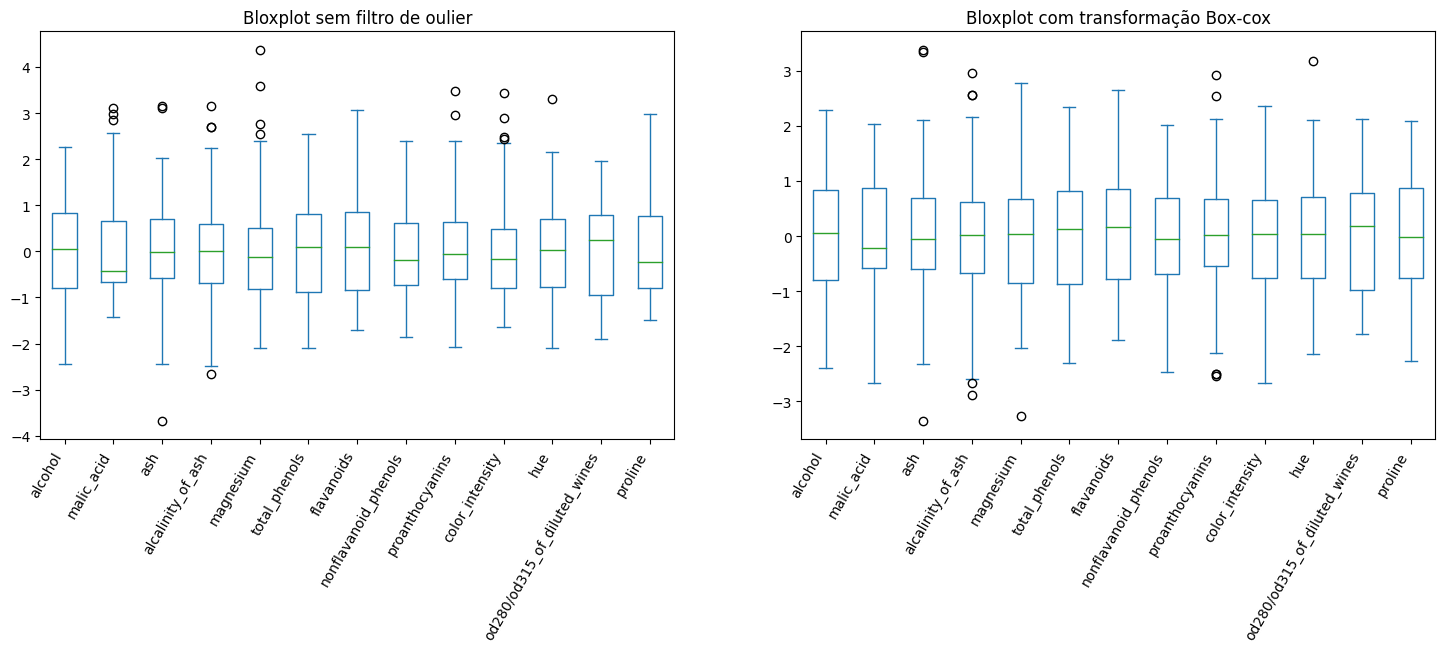

In [ ]:
df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'),columns=df.columns)

fig,axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Bloxplot sem filtro de oulier')
df_boxbox.plot.box(ax=axes[1], title='Bloxplot com transformação Box-cox')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()

### 364 - Tratamento de datas I
<h1>Lidando com datas no Python e Pandas</h1><h2>Conversão para DateTime</h2><ul><li>Importante converter para utilizar funcionalidades do Pandas</li><li>Formato padrão: AAAA-MM-DD</li></ul><h3>Opção 1: Na leitura do CSV</h3><ul><li>parse_dates: inferir automaticamente</li></ul><h3>Opção 2: Após a leitura</h3><ul><li>to_datetime(): tenta inferir automaticamente</li><li>asType(): especifica o tipo DateTime</li><li>to_datetime(format): especifica o formato explicitamente<ul><li>Evita erros e mais rápido</li><li>Usa códigos como %m, %d, %Y</li></ul></li></ul><h2>Funcionalidades com .dt</h2><ul><li>Acessor dt traz muitas funcionalidades para datas</li><li>Extrair dia, mês, ano, dia da semana etc</li><li>Formatos personalizados</li><li>Muitas outras coisas</li></ul><p>Esse mapa resume os principais pontos abordados no vídeo sobre como lidar com datas no Pandas:</p><ul><li>A importância de converter para o tipo DateTime</li><li>Opções para fazer essa conversão (na leitura, após a leitura, especificando formato)</li><li>O formato padrão DateTime do Pandas</li><li>O acessor .dt que traz muitas funcionalidades para datas</li><li>Exemplos de funcionalidades como extrair dia, mês, formatos personalizados etc.</li></ul><p>Usei a formatação Markdown para destacar os tópicos principais e facilitar a visualização. Avise-me se precisar de algum esclarecimento!</p>

In [ ]:
df=pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()

(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [ ]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Fatalities  5256 non-null   float64
dtypes: float64(1), object(1)
memory usage: 252.2+ KB


In [ ]:
# Formatando data automaticamente ao ler tabela
df=pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [ ]:
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


In [ ]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)
pd.to_datetime(df.Date)

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [ ]:
df.head(1)

,Date,Fatalities
0,1908-09-17,1.0


In [ ]:
# Especificando o formato (para dataset grande costuma ser inclusive mais rápido)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [ ]:
# Mostrando todos atributos e funções acessíveis pelo método d
df['Date'].dt.day

0       17
1       12
2        6
3        9
4       17
        ..
5263    20
5264    26
5265     1
5266     7
5267     8
Name: Date, Length: 5256, dtype: int32

In [ ]:
df['Date'].dt.day_name()

0        Thursday
1          Friday
2       Wednesday
3         Tuesday
4          Friday
          ...    
5263    Wednesday
5264      Tuesday
5265       Monday
5266       Sunday
5267       Monday
Name: Date, Length: 5256, dtype: object

In [ ]:
df['Date'].dt.day_of_week

0       3
1       4
2       2
3       1
4       4
       ..
5263    2
5264    1
5265    0
5266    6
5267    0
Name: Date, Length: 5256, dtype: int32

### 365- Tratamento de datas II
<h1>Tratamento de dados de data e hora (DateTime) no Python</h1><h2>Índice (Index)</h2><ul><li>Permite acessar mais funcionalidades para tratamento de dados</li><li>Exemplos:<ul><li>Filtrar por intervalo de anos (2000-2003)</li><li>Agrupar por mês ou ano com <code>.resample()</code></li></ul></li></ul><h2>Agrupamento</h2><ul><li>Só funciona se a coluna de DateTime estiver definida como índice</li><li>Exemplo:<ul><li><code>.resample('M').sum()</code> agrupa por mês e soma os valores</li></ul></li></ul><h2>Offset Aliases</h2><ul><li>Apelidos para períodos de tempo específicos</li><li>Exemplos:<ul><li><code>M</code>: Mês</li><li><code>MS</code>: Início do mês</li><li><code>Y</code>: Ano</li><li><code>YS</code>: Início do ano</li></ul></li></ul><h2>Documentação Pandas</h2><ul><li>Muito conteúdo sobre tratamento de dados</li><li>Data Wrangling, DateTime, offsets aliases</li><li>Exemplos de uso para cada função</li></ul>

In [ ]:
# Adicionando a data como index e ordenando-as
df_index = df.set_index('Date').sort_index()
df_index

,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [ ]:
# Filtrando do ano 2000 até o mês de maio de 2005
df_index.loc['2000-05-10':'2003-08']

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2003-08-04,2.0
2003-08-08,1.0
2003-08-20,20.0


### "Aliases Python datetime offset"
### offset aliases pandas year start

In [ ]:
# Agrupando por ano e somando as fatalidades
# Caso a data esteja como index
df_index.resample('M').sum()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0
...,...
2009-02-28,102.0
2009-03-31,44.0
2009-04-30,65.0


In [ ]:
df_monthly = df_index.resample('MS').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-01,1.0
1908-10-01,0.0
1908-11-01,0.0
1908-12-01,0.0
1909-01-01,0.0


In [ ]:
df_index.resample('YS').sum()

,Fatalities
Date,
1908-01-01,1.0
1909-01-01,0.0
1910-01-01,0.0
1911-01-01,0.0
1912-01-01,5.0
...,...
2005-01-01,1306.0
2006-01-01,1136.0
2007-01-01,931.0


###  366 - Rolling Filters
<h1>Tema central: Loading Filters (médias móveis)</h1><h2>Leitura dos dados</h2><ul><li>Lê a tabela de dados com fatalidades mensais de 1908 a 2009</li><li>Converte coluna de data para formato DateTime</li><li>Define essa coluna como índice</li><li>Cria DataFrame DFMonthly agrupando por mês e somando as fatalidades</li></ul><h2>Plot inicial</h2><ul><li>Plota os dados de fatalidades mensais (série temporal)</li><li>Muitos picos e vales, difícil identificar padrões</li></ul><h2>Média móvel (rolling mean)</h2><ul><li>Calcula média móvel com janela de 12 meses</li><li>Suaviza a série, reduz ruído</li><li>Permite visualizar a tendência mais facilmente</li></ul><h2>Variando o tamanho da janela</h2><ul><li>Janelas maiores suavizam mais a série</li><li>Mas removem detalhes e agregam mais dados</li></ul><h2>Widget interativo</h2><ul><li>Permite variar o tamanho da janela interativamente</li><li>Facilita encontrar o melhor valor desse parâmetro</li><li>Funciona como um dashboard simples para fins exploratórios</li></ul><p>Esse é um resumo abrangente do vídeo cobrindo o tema central das médias móveis e os principais tópicos discutidos. Fiz em forma de mapa mental destacando os blocos de conteúdo, espero que ajude na visualização e compreensão do assunto!</p>

<Axes: xlabel='Date'>

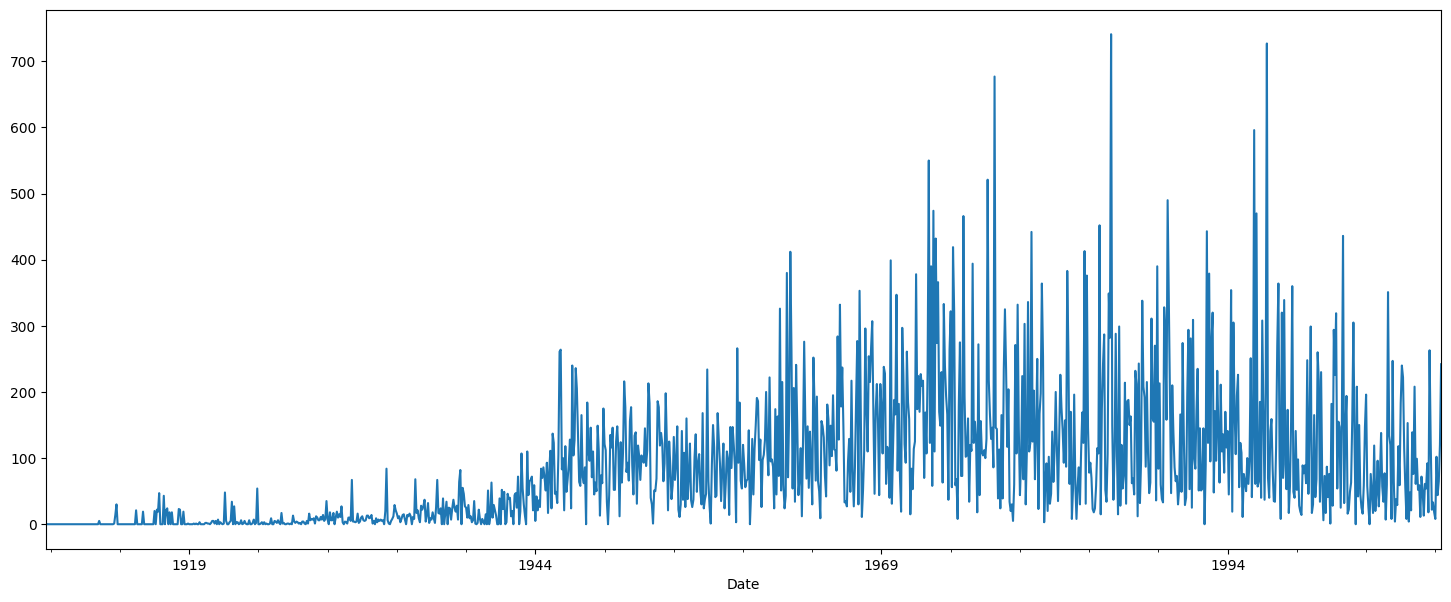

In [ ]:
# Plot sem tratamento de ruídos com rolling filter
plt.figure(figsize=(18,7))
df_monthly.Fatalities.plot()

In [ ]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-01           NaN
1908-10-01           NaN
1908-11-01      0.333333
1908-12-01      0.000000
1909-01-01      0.000000
                 ...    
2009-02-01     42.666667
2009-03-01     51.333333
2009-04-01     70.333333
2009-05-01     76.333333
2009-06-01    142.333333
Freq: MS, Name: Fatalities, Length: 1210, dtype: float64

In [ ]:
# Plot sem tratamento de ruídos com rolling filter (interact)
@interact(window_size=range(12,121,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(Dropdown(description='window_size', options=(12, 24, 36, 48, 60, 72, 84, 96, 108, 120), …

In [ ]:
@interact(window_size=(12,121,12))
def rolling_mean(window_size):
  plt.figure(figsize=(18,7))
  df_monthly.Fatalities.rolling(window_size).mean().plot()
  plt.show()

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…